<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

# Problem Set 02

Welcome to your second assignment. This exercise gives you a brief introduction to Python. 


STUDENT NAME: Alireza Shokrani

STUDENT ID: 99106255

## Import 
>Put all of your imports for this file in the below cell.

In [397]:
### START CODE HERE ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
### END CODE HERE ###

# Question 1

## Array creation
>Create the followings to numpy array:
* A: a 3\*3 array like this:
$$
A = \left(\begin{array}{cc} 
10 & 20 & 30\\
5 & 10 & 15\\
1 & 5 & 8
\end{array}\right)
$$ 
* B: a 3\*3\*4 that filled with the numbers start from 15 and have steps of 5 to the end. The array should be filled first along the first dimension then the second dimension and at last the third dimension. like this:
$$
B[:, :, 0] = \left(\begin{array}{cc} 
15 & 30 & 45\\
20 & 35 & 50\\
25 & 40 & 55
\end{array}\right)
$$ 

In [249]:
### START CODE HERE ###
A = np.array([[10, 20, 30], [5, 10, 15], [1, 5, 8]])
print(A)
B = np.arange(15, 3*3*4*5 + 15, 5).reshape(4,3,3).transpose(2,1,0)
print(B[:,:,0])
### END CODE HERE ###

[[10 20 30]
 [ 5 10 15]
 [ 1  5  8]]
[[15 30 45]
 [20 35 50]
 [25 40 55]]


## Replacement
>Replace the last slice of array B (B[:, :, 3]) with values of A. Then print the result.

In [250]:
### START CODE HERE ###
B[:,:,3] = A
print(B[:,:,3])
### END CODE HERE ###

[[10 20 30]
 [ 5 10 15]
 [ 1  5  8]]


## Axis Swap 
>Swap the first(B[:, :, 0]) and last(B[:, :, 3]) slice of the array B **only with one line of code**. Then print the result.

In [251]:
### START CODE HERE ###
B[:,:,0] , B[:,:,3] = B[:,:,3].copy() , B[:,:,0].copy()
print(B[:,:,0])
print(B[:,:,3])
### END CODE HERE ###

[[10 20 30]
 [ 5 10 15]
 [ 1  5  8]]
[[15 30 45]
 [20 35 50]
 [25 40 55]]


## Transposing 
>Transpose the array B elements in each slice. Then print the result.

In [252]:
### START CODE HERE ###
B = B.transpose(1,0,2)
print(B[:,:,3])
### END CODE HERE ###

[[15 20 25]
 [30 35 40]
 [45 50 55]]


## Matrix Multiplication
>Calculate the matrix multiplication of all slices of the array B. 
(B[:, :, 0] \* B[:, :, 1] \* B[:, :, 2] \* B[:, :, 3]). Then print the result.

>**Note**: the result should be a 3\*3 array. 

In [253]:
### START CODE HERE ###
print(np.dot(np.dot(B[:,:,0],B[:,:,1]), np.dot(B[:,:,2],B[:,:,3])))
### END CODE HERE ###

[[ 39375000  45851625  52328250]
 [ 88537500 103100625 117663750]
 [134437500 156550500 178663500]]


## Determinant
>Calculate the determinant of the array A and print it.

In [254]:
### START CODE HERE ###
print(np.linalg.det(A))
### END CODE HERE ###

0.0


# Question 2

## Loading dataset
>Load the IMDB-Movie-Data.csv file into a pandas dataframe and show its first 5 rows. Each row of this dataframe corresponds to one film.

In [255]:
### START CODE HERE ###
df = pd.read_csv('IMDB-Movie-Data.csv')
df.loc[0:4,:]
### END CODE HERE ###

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## Actors/Actresses Activity
>For each Actors/Actresses caculate the number of movies in the dataframe, then sort the actors/actresses first by their number of movies in descending order and then by their name in ascending order. 

In [325]:
### START CODE HERE ###
lst = list(df.loc[:,'Actors'])
actors = [actor for movie in lst for actor in str(movie).split(',')]
actors = [actor.strip() for actor in actors]
actors_ranking = pd.Series(actors).value_counts()
actors_ranking.sort_index(ascending=True).sort_values(ascending=False)
### END CODE HERE ###

Mark Wahlberg         15
Hugh Jackman          14
Brad Pitt             13
Christian Bale        13
Scarlett Johansson    12
                      ..
Jackie Earle Haley     1
Jackie Chan            1
Jacki Weaver           1
Jack Taylor            1
Óscar Jaenada          1
Length: 1985, dtype: int64

## Score Histogram
>Draw the histogram of metascores and ratings. 

array([[<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Metascore'}>]], dtype=object)

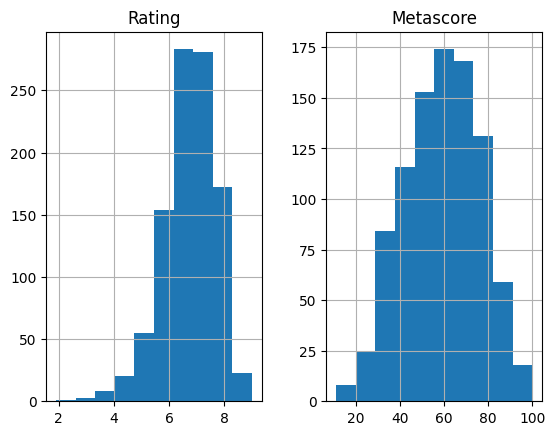

In [328]:
### START CODE HERE ###
meta_rate = df[["Rating", "Metascore"]]
meta_rate.hist()
### END CODE HERE ###

## Correlations
>Calculate the correlation between rating, votes and metascore of the movies.
Is there any meaningful relation between these features? 

In [374]:
### START CODE HERE ###
votes = list(df["Votes"])
rating = list(df["Rating"])
print(np.corrcoef(votes, rating)[0,1])
metascore = list(df["Metascore"])
new_metascore = metascore.copy()
i = 0
for score in metascore:
    if np.isnan(score):
        new_metascore.pop(i)
        rating.pop(i)
        votes.pop(i)
        i -= 1
    i += 1
print(np.corrcoef(votes, new_metascore)[0,1])
print(np.corrcoef(rating, new_metascore)[0,1])
### END CODE HERE ###

0.5115373197657557
0.3256838085336566
0.631896510038707


We can see that the correlations are positive so there could be a relationship between these factors. The most obvious one is the correlation between the Rating and the Metascore.

# Question 3

## File
> Craet a .txt file and name it "Name_actors". You must write the name of all actors/actresses in the IMDB-Movie-Data.csv file. Don't write a name multiple time and write each name in a new line.

In [379]:
### START CODE HERE ###
lst = list(df.loc[:,'Actors'])
actors = [actor for movie in lst for actor in str(movie).split(',')]
actors = [actor.strip() for actor in actors]
actors = list(dict.fromkeys(actors))

f = open("Name_actors.txt", "w")
for actor in actors:
    f.write(actor + '\n')
f.close()
### END CODE HERE ###

# Question 4

## Plot
>You must plot the number of movies in each year according to the IMDB-Movie-Data.csv file. X-axis is year and y-axis show the number of movies in each year.
> set the x_label, y_label and title for your plot.

<AxesSubplot:title={'center':'Number of Movies Produced Per Year'}, xlabel='Year', ylabel='No. of Movies'>

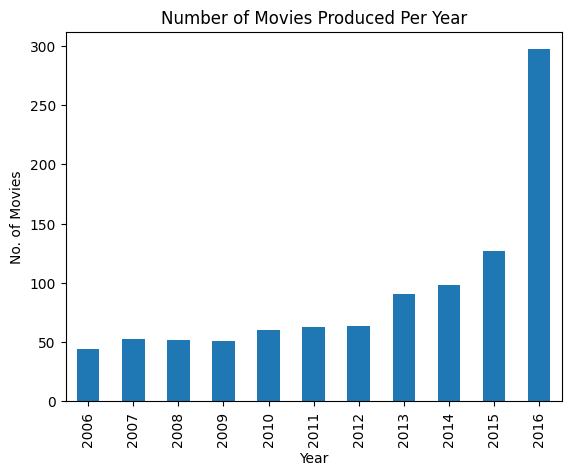

In [396]:
### START CODE HERE ###
years = df["Year"]
data = years.value_counts().sort_index()
data.plot(kind='bar', xlabel='Year', ylabel='No. of Movies', title = 'Number of Movies Produced Per Year')
### END CODE HERE ###

## Plot
>You must plot the cos(x) curve. plot 20 cycle of the curve. the frequency of first half of curve is 50 Hz and frequency of second lalf is 200 Hz. 
> set the x_label, y_label and title for your plot.

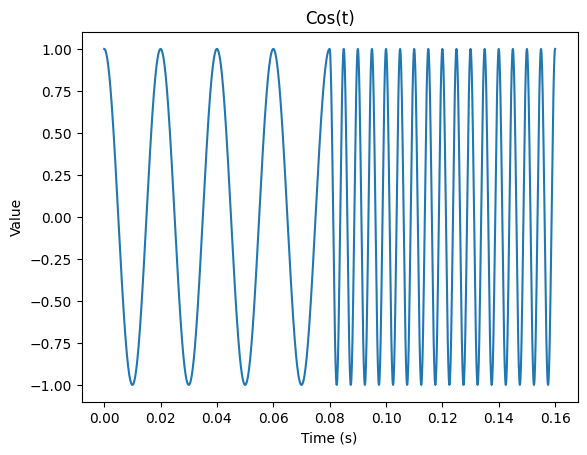

In [406]:
### START CODE HERE ###
t1 = np.linspace(0, 0.08, 801)
t2 = np.linspace(0.0801, 0.16, 800)
x1 = np.cos(2*np.pi*50*t1)
x2 = np.cos(2*np.pi*200*t2)
plt.plot(np.append(t1,t2),np.append(x1,x2))
plt.title("Cos(t)")
plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.show()
### END CODE HERE ###